<a href="https://colab.research.google.com/github/BendySky/ARC-4-Chem/blob/main/ResNetMkII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ResNet Mk2

*   This notebook begins my intro into making custom ResNets. 
*   The end goal is to allow a user to build a residual network of a custom size/depth




##1.0 Mount Google Drive and import all necesseary packages

In [ ]:
#@title Mount the Drive

import tensorflow as tf
from tensorflow import keras
from google.colab import drive
import gspread
import pandas as pd
import numpy as np
from oauth2client.service_account import ServiceAccountCredentials
import pickle
import pywt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DataSavePath = '/content/gdrive/MyDrive/RamanSpectra/TestResults/ResNetMk2/2-3-21/' #@param {type:"string"}
images_dir=DataSavePath

##2.0 Load Training/Testing Data
First we need to specify the filepath for each of the training and testing datasets. Check the /contents/gdrive directory to the left and copy the path that each dataset is in. To download data of the 5 amino acids we trained our network on, click here..

In [ ]:
def createList(r1, r2): 
    if (r1 == r2): 
        return r1 
    else: 
        res = [] #create empty list 
        while(r1 < r2+1 ): #loop append until r2 is reached
            res.append(r1) 
            r1 += 1
        return res 

#@markdown * Below you can select the index of rows (if any) you would like to delete from all of the datasets
Row1 =  0#@param {type:"slider", min:0, max:100, step:1}

#@markdown * select the number of rows to delete by adjusting the slider
Row2 =  52#@param {type:"slider", min:0, max:100, step:1}

numRows = createList(Row1, Row2)

### 2.1 Training Datasets

In [ ]:
#@title Select filepaths for training data
#@markdown Select the filepath location of each of the datasets
filepath1 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Asparagine.csv" #@param {type:"string"}
filepath2 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/CHAPS_image_scan_001_Spec.Data 1_F.csv" #@param {type:"string"}
filepath3 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Glycine.csv" #@param {type:"string"}
filepath4 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Histidine.csv" #@param {type:"string"}
filepath5 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Leucine.csv" #@param {type:"string"}
filepath6 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Lysine.csv" #@param {type:"string"}
filepath7 =  "/content/gdrive/MyDrive/RamanSpectra/ImageScans/MOPS_image_scan_002_Spec.Data 1_F.csv" #@param {type:"string"}
filepath8 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/beta-estradiol_imageScan_001_Spec.Data 1_F.csv" #@param {type:"string"}
filepath9 =  "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Chloroquine.csv" #@param {type:"string"}
filepath10 =  "/content/gdrive/MyDrive/RamanSpectra/ImageScans/fluconazole_image_scan_001_Spec.Data 1_F.csv"#@param {type:"string"}
filepath11 =  "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Forskolin_image_scan_000_Spec.Data 1_F.csv" #@param {type:"string"}
filepath12 =  "/content/gdrive/MyDrive/RamanSpectra/ImageScans/LauricAcid1sec10accImagescan_001_Spec.Data 1_F.csv"#@param {type:"string"}
filepath13 = "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Amino Acids/Tryptophan.csv" #@param {type:"string"}
filepath14 =  "/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of D-(+)-Maltose Monohydrate Map_000_Spec.Data 1_F (1).csv"#@param {type:"string"}
filepath15 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/anthrone_image_scan_000_Spec.Data 1_F.csv"#@param {type:"string"}
filepath16 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of Sodium Dodecylsulfate.Data 1_F.csv"#@param {type:"string"}
filepath17 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of Potato Starch map_000_Spec.Data 1_F (1).csv"#@param {type:"string"}
filepath18 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of Progesterone (s).Data 1_F.csv"#@param {type:"string"}
filepath19 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of Uridine Map_000_Spec.Data 1_F (1).csv"#@param {type:"string"}
filepath20 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of sodium_deoxycholate_image_Spec.Data 1_F (1).csv"#@param {type:"string"}
#filepath21 ="/content/gdrive/MyDrive/RamanSpectra/ImageScans/Copy of D-(+)-Maltose Monohydrate Map_000_Spec.Data 1_F (1).csv"#@param {type:"string"}
#filepath22 =""#@param {type:"string"}

In [ ]:
#@title Import the training datasets and reshape the data
training1 = pd.read_csv(filepath1)
train1 = training1.drop(training1.index[numRows])
train1 = train1.drop(columns='X-Axis')

train2 = pd.read_csv(filepath2)
train2 = train2.drop(train2.index[numRows])
train2 = train2.drop(columns='X-Axis')

train3 = pd.read_csv(filepath3)
train3 = train3.drop(train3.index[numRows])
train3 = train3.drop(columns='X-Axis')

train4 = pd.read_csv(filepath4)
train4 = train4.drop(train4.index[numRows])
train4 = train4.drop(columns='X-Axis')

train5 = pd.read_csv(filepath5)
train5 = train5.drop(train5.index[numRows])
train5 = train5.drop(columns='X-Axis')

train6 = pd.read_csv(filepath6)
train6 = train6.drop(train6.index[numRows])
train6 = train6.drop(columns='X-Axis')

train7 = pd.read_csv(filepath7)
train7 = train7.drop(train7.index[numRows])
train7 = train7.drop(columns='X-Axis')

train8 = pd.read_csv(filepath8)
train8 = train8.drop(train8.index[numRows])
train8 = train8.drop(columns='X-Axis')

train9 = pd.read_csv(filepath9)
train9 = train9.drop(train9.index[numRows])
train9 = train9.drop(columns='X-Axis')

train10 = pd.read_csv(filepath10)
train10 = train10.drop(train10.index[numRows])
train10 = train10.drop(columns='X-Axis')

train11 = pd.read_csv(filepath11)
train11 = train11.drop(train11.index[numRows])
train11 = train11.drop(columns='X-Axis')

train12 = pd.read_csv(filepath12)
train12 = train12.drop(train12.index[numRows])
train12 = train12.drop(columns='X-Axis')

train13 = pd.read_csv(filepath13)
train13 = train13.drop(train13.index[numRows])
train13 = train13.drop(columns='X-Axis')

train14 = pd.read_csv(filepath14)
train14 = train14.drop(train14.index[numRows])
train14 = train14.drop(columns='X-Axis')

train15 = pd.read_csv(filepath15)
train15 = train15.drop(train15.index[numRows])
train15 = train15.drop(columns='X-Axis')

train16 = pd.read_csv(filepath16)
train16 = train16.drop(train16.index[numRows])
train16 = train16.drop(columns='X-Axis')

train17 = pd.read_csv(filepath17)
train17 = train17.drop(train17.index[numRows])
train17 = train17.drop(columns='X-Axis')

train18 = pd.read_csv(filepath18)
train18 = train18.drop(train18.index[numRows])
train18 = train18.drop(columns='X-Axis')

train19 = pd.read_csv(filepath19)
train19 = train19.drop(train19.index[numRows])
train19 = train19.drop(columns='X-Axis')

train20 = pd.read_csv(filepath20)
train20 = train20.drop(train20.index[numRows])
train20 = train20.drop(columns='X-Axis')

#train21 = pd.read_csv(filepath21)
#train21 = train21.drop(train21.index[numRows])
#train21 = train21.drop(columns='X-Axis')

#train22 = pd.read_csv(filepath22)
#train22 = train22.drop(train22.index[numRows])
#train22 = train22.drop(columns='X-Axis')


print("\nShape of imported datasets:", training1.shape)
print("Updated shape of datasets:", train1.shape)
print("Number of rows removed:", Row2+1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2


Shape of imported datasets: (1025, 2501)
Updated shape of datasets: (972, 2500)
Number of rows removed: 53


###2.2 Testing Datasets

In [ ]:
#@title Specify filepaths where the testing data is located

testFilepath1 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestL-(+)-Asparagine.csv" #@param {type:"string"}
testFilepath2 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestCHOPS.csv" #@param {type:"string"}
testFilepath3 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestGlycine.csv" #@param {type:"string"}
testFilepath4 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestL-Histidine.csv" #@param {type:"string"}
testFilepath5 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestL-Leucine.csv" #@param {type:"string"}
testFilepath6 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestL-Lysine.csv" #@param {type:"string"}
testFilepath7 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestMOPS.csv"#@param {type:"string"}
testFilepath8 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestBetaEstradiol.csv"#@param {type:"string"}
testFilepath9 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestChloroquine2.csv"#@param {type:"string"}
testFilepath10 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestFluconazole.csv"#@param {type:"string"}
testFilepath11 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestForskolin.csv"#@param {type:"string"}
testFilepath12 = "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestLauricAcid.csv" #@param {type:"string"}
testFilepath13 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestTryptophan.csv"#@param {type:"string"}
testFilepath14 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestD-(+)-MaltoseMonohydrate.csv"#@param {type:"string"}
testFilepath15 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestAnthrone.csv"#@param {type:"string"}
testFilepath16 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestNaDodecylSulfate.csv"#@param {type:"string"}
testFilepath17 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestPotatoStarch.csv"#@param {type:"string"}
testFilepath18 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestProgesterone.csv"#@param {type:"string"}
testFilepath19 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestUridine.csv"#@param {type:"string"}
testFilepath20 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestSodiumDeoxycholate.csv"#@param {type:"string"}
#testFilepath21 =  "/content/gdrive/MyDrive/RamanSpectra/TestData(1-28-21)/TestD-(+)-MaltoseMonohydrate.csv"#@param {type:"string"}
#testFilepath22 =  "/content/gdrive/MyDrive/RamanSpectra/TimeSeries/data_14Time Series_000_Spec.Data 1.csv"#@param {type:"string"}

In [ ]:
#@title Import testing data and remove rows previvously specified 

testing1 = pd.read_csv(testFilepath1)
test1 = testing1.drop(testing1.index[numRows])
test1 = test1.drop(columns='X-Axis')

testing2 = pd.read_csv(testFilepath2)
test2 = testing2.drop(testing2.index[numRows])
test2 = test2.drop(columns='X-Axis')

testing3 = pd.read_csv(testFilepath3)
test3 = testing3.drop(testing3.index[numRows])
test3 = test3.drop(columns='X-Axis')

testing4 = pd.read_csv(testFilepath4)
test4 = testing4.drop(testing4.index[numRows])
test4 = test4.drop(columns='X-Axis')

testing5 = pd.read_csv(testFilepath5)
test5 = testing5.drop(testing5.index[numRows])
test5 = test5.drop(columns='X-Axis')

testing6 = pd.read_csv(testFilepath6)
test6 = testing6.drop(testing6.index[numRows])
test6 = test6.drop(columns='X-Axis')

testing7 = pd.read_csv(testFilepath7)
test7 = testing7.drop(testing7.index[numRows])
test7 = test7.drop(columns='X-Axis')

testing8 = pd.read_csv(testFilepath8)
test8 = testing8.drop(testing8.index[numRows])
test8 = test8.drop(columns='X-Axis')

testing9 = pd.read_csv(testFilepath9)
test9 = testing9.drop(testing9.index[numRows])
test9 = test9.drop(columns='X-Axis')

testing10 = pd.read_csv(testFilepath10)
test10 = testing10.drop(testing10.index[numRows])
test10 = test10.drop(columns='X-Axis')

testing11 = pd.read_csv(testFilepath11)
test11 = testing11.drop(testing11.index[numRows])
test11 = test11.drop(columns='X-Axis')

testing12 = pd.read_csv(testFilepath12)
test12 = testing12.drop(testing12.index[numRows])
test12 = test12.drop(columns='X-Axis')

testing13 = pd.read_csv(testFilepath13)
test13 = testing13.drop(testing13.index[numRows])
test13 = test13.drop(columns='X-Axis')

testing14 = pd.read_csv(testFilepath14)
test14 = testing14.drop(testing14.index[numRows])
test14 = test14.drop(columns='X-Axis')

testing15 = pd.read_csv(testFilepath15)
test15 = testing15.drop(testing15.index[numRows])
test15 = test15.drop(columns='X-Axis')

testing16 = pd.read_csv(testFilepath16)
test16 = testing16.drop(testing16.index[numRows])
test16 = test16.drop(columns='X-Axis')

testing16 = pd.read_csv(testFilepath16)
test16 = testing16.drop(testing16.index[numRows])
test16 = test16.drop(columns='X-Axis')

testing17 = pd.read_csv(testFilepath17)
test17 = testing17.drop(testing17.index[numRows])
test17 = test17.drop(columns='X-Axis')

testing18 = pd.read_csv(testFilepath18)
test18 = testing18.drop(testing18.index[numRows])
test18 = test18.drop(columns='X-Axis')

testing19 = pd.read_csv(testFilepath19)
test19 = testing19.drop(testing19.index[numRows])
test19 = test19.drop(columns='X-Axis')

testing20 = pd.read_csv(testFilepath20)
test20 = testing20.drop(testing20.index[numRows])
test20 = test20.drop(columns='X-Axis')

#testing21 = pd.read_csv(testFilepath21)
#test21 = testing21.drop(testing21.index[numRows])
#test21 = test21.drop(columns='X-Axis')



print("Shape of imported testing datasets:", testing1.shape)
print("Updated shape of testing datsets:", test1.shape)
print("Number of rows removed:", Row2+1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

Shape of imported testing datasets: (1025, 530)
Updated shape of testing datsets: (972, 529)
Number of rows removed: 53


##3.0 Add Labels to the Datasets


###3.1 Training Data

In [ ]:
#@title Create labels for the training data
train1_lab = [0]*train1.shape[1]
train2_lab = [1]*train2.shape[1]
train3_lab = [2]*train3.shape[1]
train4_lab = [3]*train4.shape[1]
train5_lab = [4]*train5.shape[1]
train6_lab = [5]*train6.shape[1]
train7_lab = [6]*train7.shape[1]
train8_lab = [7]*train8.shape[1]
train9_lab = [8]*train9.shape[1]
train10_lab = [9]*train10.shape[1]
train11_lab = [10]*train11.shape[1]
train12_lab = [11]*train12.shape[1]
train13_lab = [12]*train13.shape[1]
train14_lab = [13]*train14.shape[1]
train15_lab = [14]*train15.shape[1]
train16_lab = [15]*train16.shape[1]
train17_lab = [16]*train17.shape[1]
train18_lab = [17]*train18.shape[1]
train19_lab = [18]*train19.shape[1]
train20_lab = [19]*train20.shape[1]
#train21_lab = [20]*train21.shape[1]

#transpose datasets
train1 = train1.T 
train2 = train2.T
train3 = train3.T
train4 = train4.T
train5 = train5.T
train6 = train6.T
train7 = train7.T
train8 = train8.T
train9 = train9.T
train10 = train10.T
train11 = train11.T
train12 = train12.T
train13 = train13.T
train14 = train14.T
train15 = train15.T
train16 = train16.T
train17 = train17.T
train18 = train18.T
train19 = train19.T
train20 = train20.T
#train21 = train21.T

train1['Label'] = train1_lab
train2['Label'] = train2_lab
train3['Label'] = train3_lab
train4['Label'] = train4_lab
train5['Label'] = train5_lab
train6['Label'] = train6_lab
train7['Label'] = train7_lab
train8['Label'] = train8_lab
train9['Label'] = train9_lab
train10['Label'] = train10_lab
train11['Label'] = train11_lab
train12['Label'] = train12_lab
train13['Label'] = train13_lab
train14['Label'] = train14_lab
train15['Label'] = train15_lab
train16['Label'] = train16_lab
train17['Label'] = train17_lab
train18['Label'] = train18_lab
train19['Label'] = train19_lab
train20['Label'] = train20_lab
#train21['Label'] = train21_lab


###3.2 Testing Data

In [ ]:
#@title Create labels for the testing data

test1_lab = [0]*test1.shape[1]
test2_lab = [1]*test2.shape[1]
test3_lab = [2]*test3.shape[1]
test4_lab = [3]*test4.shape[1]
test5_lab = [4]*test5.shape[1]
test6_lab = [5]*test6.shape[1]
test7_lab = [6]*test7.shape[1]
test8_lab = [7]*test8.shape[1]
test9_lab = [8]*test9.shape[1]
test10_lab = [9]*test10.shape[1]
test11_lab = [10]*test11.shape[1]
test12_lab = [11]*test12.shape[1]
test13_lab = [12]*test13.shape[1]
test14_lab = [13]*test14.shape[1]
test15_lab = [14]*test15.shape[1]
test16_lab = [15]*test16.shape[1]
test17_lab = [16]*test17.shape[1]
test18_lab = [17]*test18.shape[1]
test19_lab = [18]*test19.shape[1]
test20_lab = [19]*test20.shape[1]
#test21_lab = [20]*test21.shape[1]

#transpose datasets
test1 = test1.T
test2 = test2.T
test3 = test3.T
test4 = test4.T
test5 = test5.T
test6 = test6.T
test7 = test7.T
test8 = test8.T
test9 = test9.T
test10 = test10.T
test11 = test11.T
test12 = test12.T
test13 = test13.T
test14 = test14.T
test15 = test15.T
test16 = test16.T
test17 = test17.T
test18 = test18.T
test19 = test19.T
test20 = test20.T
#test21 = test21.T

test1['Label'] = test1_lab
test2['Label'] = test2_lab
test3['Label'] = test3_lab
test4['Label'] = test4_lab
test5['Label'] = test5_lab
test6['Label'] = test6_lab
test7['Label'] = test7_lab
test8['Label'] = test8_lab
test9['Label'] = test9_lab
test10['Label'] = test10_lab
test11['Label'] = test11_lab
test12['Label'] = test12_lab
test13['Label'] = test13_lab
test14['Label'] = test14_lab
test15['Label'] = test15_lab
test16['Label'] = test16_lab
test17['Label'] = test17_lab
test18['Label'] = test18_lab
test19['Label'] = test19_lab
test20['Label'] = test20_lab
#test21['Label'] = test21_lab

##4.0 Preparing the data for ResNet

In [ ]:
#@title Concatenate the training data (and the labels) into one dataframe. (current model shuffles data immediately after concatenating)

train = pd.concat([train1, train2, train3, train4, train5, 
                   train6, train7, train8, train9, train10, 
                   train11, train12, train13, train14, train15,
                   train16, train17, train18, train19, train20])

train_shuffle = train.sample(frac=1)

train_lab = train_shuffle.pop("Label")
train_lab = np.reshape(np.array(train_lab), (len(train_lab),1))
train_inpt = np.array(train_shuffle)

train_data = (train_inpt, train_lab)

In [ ]:
#@title Pickle the concatenated/shuffled datasets
filePath = "/content/gdrive/MyDrive/Colab Notebooks/train_data.picke" #@param {type: "raw"}
out_training = open(filePath,"wb")
pickle.dump(train_data, out_training)
out_training.close()

In [ ]:
#@title Load the Pickled file

in_training =open("/content/gdrive/MyDrive/Colab Notebooks/test_data.pickle", "rb")
data = pickle.load(in_training)
in_training.close(

In [ ]:
#@title Preprocess the data

from keras.utils import to_categorical

inpt = train_data[0].reshape(train_data[0].shape[0],train_data[0].shape[1],1)
inpt = inpt.astype('float32')

lab = train_data[1]
lab = lab.astype('float32')
lab = to_categorical(lab)

#np.asarray(x).astype('float32')

##5.0 Training the ResNet

In [ ]:
NumberClasses =  20 #@param {type:"number"}
#NumberFilters = 64 #@param {type:"number"}
LearningRate = 0.0001 #@param {type:"number"}
NumberEpochs = 25 #@param {type:"number"
BatchSize = 128 #@param {type:"number"}
Stride =  1#@param {type:"raw"}
LassoRegression = 0 #@param {type:"number"}
RidgeRegression = 0 #@param {type:"number"}

L1=LassoRegression
L2=RidgeRegression

In [ ]:
#@title Define the Identity and Convolutional Blocks

from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

initializer = tf.keras.initializers.GlorotUniform(seed=0)

def identity_block(X, f, filters, stage, block):

  #defining name basis
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'bn' + str(stage) + block + '_branch'

  #retrieve filters
  F1, F2, F3 = filters

  #save the input value. You'll need this later to add back the main path
  x_shortcut = X

  #First component of the main path
  X = Conv1D(filters=F1, kernel_size=1, strides=Stride, padding='same', 
             kernel_initializer=initializer, 
             name=ConvNameBase + '2a')(X)
  X = BatchNormalization(axis=2, name = BatchNormBase + '2a')(X)
  X = Activation('relu')(X)

  #Second component of main path
  X = Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same', 
             kernel_initializer=initializer, 
             name=ConvNameBase + '2b')(X)
  X = BatchNormalization(axis=2, name=BatchNormBase + '2b')(X)
  X = Activation('relu')(X)

  #Third Component of main path
  X = Conv1D(filters=F3, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer,
             name=ConvNameBase + '2c')(X)
  X = BatchNormalization(axis=2, name=BatchNormBase + '2c')(X)
  
  #Final step: add shortcut to the main path, and pass it through ReLU activation
  X = Add()([X, x_shortcut])
  X = Activation('relu')(X)

  return X

def convolutional_block(X, f, filters, stage, block, s=2):

  #Defining name bases
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'res' + str(stage) + block + '_branch'

  #retrive n_filters
  F1, F2, F3 = filters

  #Save the input value
  x_shortcut = X

  #First component of the main path
  X = Conv1D(F1, strides=s, kernel_size=f, kernel_initializer=initializer,
             padding='same', name=ConvNameBase + '2a')(X)
  X = BatchNormalization(axis=2, name=BatchNormBase + '2a')(X)
  X = Activation('relu')(X)

  #Second Component of main path
  X = Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer,
             name=ConvNameBase + '2b')(X)
  X = BatchNormalization(axis=2, name=BatchNormBase + '2b')(X)
  X = Activation('relu')(X)

  #Third component of main path
  X = Conv1D(filters=F3, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer,
             name=ConvNameBase + '2c')(X)
  X = BatchNormalization(axis=2, name=BatchNormBase + '2c')(X)

  ###### SHORTCUT PATH ######
  x_shortcut = Conv1D(filters = F3, kernel_size=1, strides=s, 
                      padding='same', name=ConvNameBase + '1',
                      kernel_initializer=initializer)(x_shortcut)
  x_shortcut = BatchNormalization(axis=2, name=BatchNormBase + '1')(x_shortcut)

  #Add shortcut to main path and pass in through ReLU activation
  X = Add()([X, x_shortcut])
  X = Activation('relu')(X)

  return X

In [ ]:
#@title Compile ResNet Mk2
from tensorflow.keras.layers import ZeroPadding1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from keras.utils.vis_utils import plot_model


x_input = keras.layers.Input([train_data[0].shape[1],1])

X = ZeroPadding1D(padding=3)(x_input)

#stage 1
X = Conv1D(64, kernel_size=7, strides=2,
           name='Convolution1', kernel_initializer=initializer)(X)
X = BatchNormalization(name="BatchNormConv1")(X)
X = keras.layers.Activation('relu')(X)
X = MaxPooling1D(3, strides=2)(X)

#Stage 2
X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

#Stage 3
X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3,
                        block='a', s=2)
X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')

#Stage 4 
X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4,
                        block='a', s=2)
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')

X = GlobalAveragePooling1D(name="GAP1D")(X)

###### OUTPUT LAYER ######
X = Flatten()(X)
X = Dense(NumberClasses, activation='softmax', name='FC_output' +str(NumberClasses),
          kernel_initializer=initializer)(X)

ResNet = Model(inputs = x_input, outputs=X, name='ResNetMk2')
ResNet.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, 
                                               beta_1=0.9, beta_2=0.999, 
                                               epsilon=1e-07),
               loss='categorical_crossentropy', metrics=['accuracy'])
#ResNet.summary()
#plot_model(ResNet, show_shapes=True, show_layer_names=True)

In [ ]:
#@title Train ResNet Mk2

resnet = ResNet.fit(inpt, lab, epochs=NumberEpochs,
                    batch_size=BatchSize,
                    validation_split=0.2)

Epoch 1/25
313/313 [==============================] - 104s 284ms/step - loss: 0.6171 - accuracy: 0.8321 - val_loss: 6.7490 - val_accuracy: 0.0984
Epoch 2/25
313/313 [==============================] - 89s 283ms/step - loss: 0.0202 - accuracy: 0.9958 - val_loss: 1.3577 - val_accuracy: 0.7890
Epoch 3/25
313/313 [==============================] - 89s 283ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 1.1892e-04 - val_accuracy: 1.0000
Epoch 4/25
313/313 [==============================] - 89s 283ms/step - loss: 8.6621e-04 - accuracy: 0.9999 - val_loss: 2.1534e-04 - val_accuracy: 1.0000
Epoch 5/25
313/313 [==============================] - 89s 283ms/step - loss: 0.0199 - accuracy: 0.9966 - val_loss: 3.2804e-04 - val_accuracy: 1.0000
Epoch 6/25
313/313 [==============================] - 89s 283ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 3.2255 - val_accuracy: 0.7153
Epoch 7/25
313/313 [==============================] - 89s 283ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss

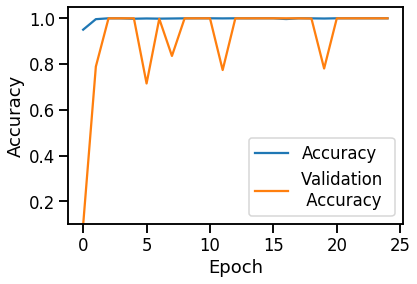

In [ ]:
#@title Model training accuracy
from matplotlib import pyplot as plt

plt.plot(resnet.history['accuracy'], label='Accuracy')
plt.plot(resnet.history['val_accuracy'], label='Validation \n Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.05])
plt.legend(loc='lower right')
#plt.title("ResNet CNN")
#plt.savefig(f"{images_dir}/acc.png")
plt.show()

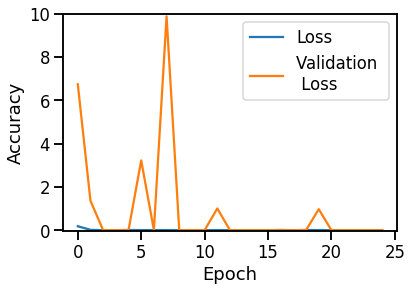

In [ ]:
#@title Model training loss

plt.plot(resnet.history['loss'], label='Loss')
plt.plot(resnet.history['val_loss'], label='Validation \n Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.05, 10.0])
plt.legend(loc='upper right')
#plt.savefig(f"{images_dir}/loss.png")
plt.show()

##6.0 Test the network

In [ ]:
#@title Concatenate the testing dataset

test = pd.concat([test1, test2, test3, test4, test5, 
                  test6, test7, test8, test9, test10, 
                  test11, test12, test13, test14, test15, 
                  test16, test17, test18, test19, test20])
test_data = test.sample(frac=1)

test_lab = test_data.pop("Label")
test_lab = np.reshape(np.array(test_lab), (len(test_lab),1))
test_inpt = np.array(test_data)

t_data = (test_inpt, test_lab)

test_out = open("/content/gdrive/My Drive/Colab Notebooks/test_data.pickle", "wb")
pickle.dump(t_data, test_out)
test_out.close()

test_in = open("/content/gdrive/My Drive/Colab Notebooks/test_data.pickle", "rb")
t_data = pickle.load(test_in)
test_in.close()


In [ ]:
#@title Reshape testing data
test_input = t_data[0].reshape(t_data[0].shape[0],t_data[0].shape[1],1)
test_input = test_input.astype('float32')

t_lab = t_data[1]
t_lab = t_lab.astype('float32')
t_lab = to_categorical(t_lab)

In [ ]:
#@title Classify the testing data

y_predict = ResNet.predict(test_input)
y_actual = t_lab

In [ ]:
#@title *optional*: Print raw results

#predicted labels
print(len(y_predict), y_predict.shape)
print(y_predict)

#actual labels
print(len(y_actual), y_actual.shape)
print(y_actual)

In [ ]:
#@title Accuracy of ResNet
from sklearn.metrics import accuracy_score, f1_score, precision_score

acc = (y_predict.argmax(axis=1) == y_actual.argmax(axis=1)).mean()
print('Accuracy: {:0.1f}%'.format(100*acc))


f1score = f1_score(y_actual.argmax(axis=1), y_predict.argmax(axis=1), average='micro')
prec_score = precision_score(y_actual.argmax(axis=1), y_predict.argmax(axis=1), average='micro')
print("F1 score: ", f1score)
print("Precision score: ", prec_score)

Accuracy: 90.2%
F1 score:  0.9017013232514177
Precision score:  0.9017013232514177


Label the samples for the confusion matrix. Make sure that the labels are in the order of the input data from Part 1.0

In [ ]:
SampleOne = "Asparagine" #@param {type:"raw"}
SampleTwo = "CHAPS" #@param {type:"raw"}
SampleThree = "Glycine" #@param {type:"raw"}
SampleFour = "Histidine" #@param {type:"raw"}
SampleFive = "Leucine" #@param {type:"raw"}
SampleSix = "Lysine" #@param {type:"raw"}
SampleSeven =  "MOPS" #@param {type:"raw"}
SampleEight = "Beta-estradiol" #@param {type:"raw"}
SampleNine = "Chloroquine" #@param {type:"raw"}
SampleTen = "Fluconazole" #@param {type:"raw"}
SampleEleven = "Forskolin" #@param {type:"raw"}
SampleTwelve = "Lauric Acid" #@param {type:"raw"}
SampleThirteen = "Tryptophan" #@param {type:"raw"}  
SampleFourteen = "Maltose Monohydrate" #@param {type:"raw"}
SampleFifteen = "Anthrone" #@param {type:"raw"}
SampleSixteen = "Sodium Dodecyl Sulfate" #@param {type:"raw"}
SampleSeventeen = "Potato Starch" #@param {type:"raw"}
SampleEighteen = "Progesterone" #@param {type:"raw"}
SampleNineteen = "Uridine" #@param {type:"raw"}
SampleTwenty = "Sodium Deoxycholate" #@param {type:"raw"}
#SampleTwentyOne = "Methyl Viologen" #@param {type:"raw"}

order = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19}

chem_species = {}
chem_species[0] = SampleOne
chem_species[1] = SampleTwo
chem_species[2] = SampleThree
chem_species[3] = SampleFour
chem_species[4] = SampleFive
chem_species[5] = SampleSix
chem_species[6] = SampleSeven
chem_species[7] = SampleEight
chem_species[8] = SampleNine
chem_species[9] = SampleTen
chem_species[10] = SampleEleven
chem_species[11] = SampleTwelve
chem_species[12] = SampleThirteen
chem_species[13] = SampleFourteen
chem_species[14] = SampleFifteen
chem_species[15] = SampleSixteen
chem_species[16] = SampleSeventeen
chem_species[17] = SampleEighteen
chem_species[18] = SampleNineteen
chem_species[19] = SampleTwenty
#chem_species[20] = SampleTwentyOne


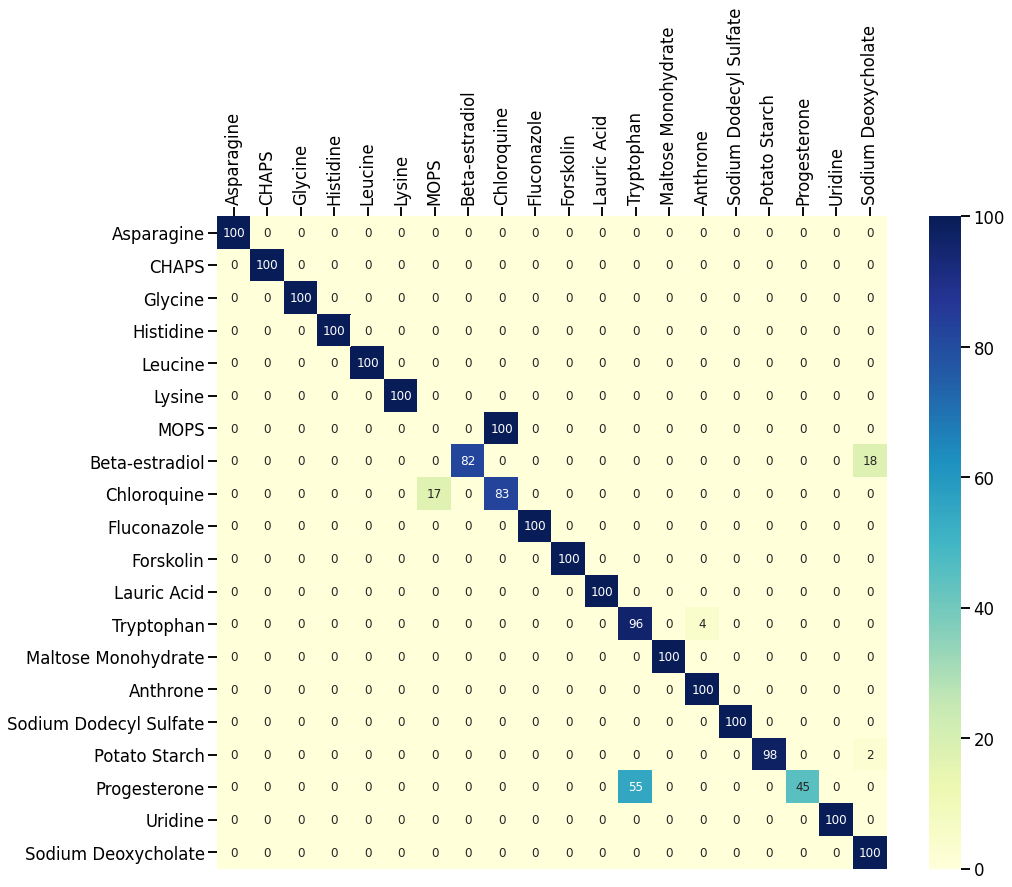

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title Confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix


sns.set_context("talk", rc={"font":"Helvetica", "font.size":12})
label = [chem_species[i] for i in order] 
#takes a vector of the labels that were previously one-hot encoded
con_mat = confusion_matrix(y_actual.argmax(axis=1), 
                           y_predict.argmax(axis=1))
plt.figure(figsize=(15,12))
con_mat = 100 * con_mat / con_mat.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(con_mat, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label, yticklabels=label)
ax.xaxis.tick_top()
plt.xticks(rotation=90) 
plt.show()
plt.savefig(f"{images_dir}/con_mat.png")